In [1]:
using FileIO
using Images
using ImageSegmentation
using Plots
using GaussianMixtures
using Statistics

In [220]:
using Profile

In [185]:
include("tiffxml.jl")

embedxml

In [2]:
img3d1 = load("../mRNA_confocal_hamamatsu-60X-TIRF/20200316_result/s35-c1.tiff");

In [3]:
img3d2 = load("../mRNA_confocal_hamamatsu-60X-TIRF/20200316_result/s3_c5.tiff");

In [8]:
s3c2 = load("../mRNA_confocal_hamamatsu-60X-TIRF/20200316_result/s3_c2.tiff");

In [252]:
function create3dmask(zstack)
    mask = zeros(size(zstack))
    thresholds_z = [real(yen_threshold(zstack[:, :, i])) for i in 1:20]
    threshold_3d = median(thresholds_z)
    #print(threshold_3d)
    mask = opening(zstack .> threshold_3d)
    mask, threshold_3d
end

function extract3dnucleus(stack)
    z_depth = 20
    t_length = size(stack)[3] ÷ z_depth
    nucleus = zeros(size(stack))
    thresholds = zeros(t_length)
    nucleus_3dmask = zeros(size(stack)[1], size(stack)[2], z_depth)
    for i in 1:t_length
        nucleus_3dmask, thresholds[i] = create3dmask(stack[:, :,(i-1)*20+1:20*i])
        nucleus[:,:,(i-1)*20+1:20*i] = nucleus_3dmask .* stack[:, :,(i-1)*20+1:20*i]
    end
    nucleus, thresholds
end

extract3dnucleus (generic function with 1 method)

In [251]:
@time nucleus_all, threshold_all = extract3dnucleus(s3c2);
@time save(File(format"TIFF", "s5-c2_clear.ome.tiff"), N0f16.(nucleus_all))
x, y, z_all = size(nucleus_all)
@time embedxml(x, y, 20, z_all÷20, "s5-c2_clear.ome.tiff")

0.0028534370.00284580750.0027771420.00278477140.00275425330.00269321720.00272373530.00265506980.00268558790.00263218120.00264744040.00259403370.0025406270.00256351570.0025101090.0024490730.0024490730.00244144350.00246433220.00246433220.00245670250.00248722060.00247196150.0024490730.0024338140.0024032960.00242618450.00238803680.00241092550.00241855490.0024338140.00241092550.00244144350.00244144350.00242618450.00246433220.00248722060.00245670250.0024338140.0024338140.00239566640.0023727780.00235751880.00230411230.00234988940.0023117420.0022812240.00232700070.00229648270.002342260.00234988940.00238040740.00245670250.0024490730.00235751880.00242618450.00238040740.00238040740.00228885330.00230411230.00236514840.00233463030.00241092550.00239566640.00242618450.00241092550.0024490730.00242618450.00242618450.00242618450.0024032960.00241855490.00238803680.0024795910.00239566640.00238040740.00235751880.002342260.00234988940.00233463030.002342260.00231937130.00231937130.00231937130.00231937130.002

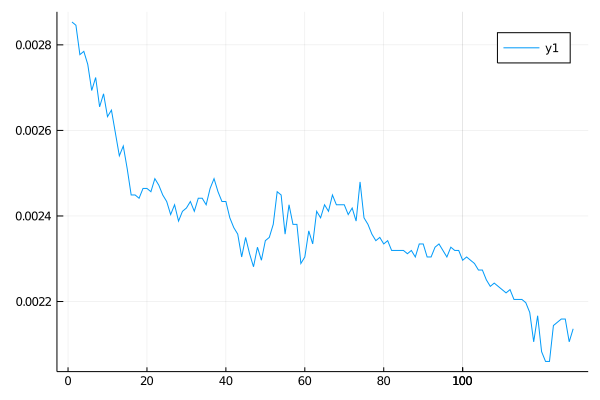

In [253]:
plot(threshold_all)

In [254]:
@time nucleus_all_, threshold_all_ = extract3dnucleus(img3d2);
@time save(File(format"TIFF", "img3d2_clear.ome.tiff"), N0f16.(nucleus_all_))
x, y, z_all = size(nucleus_all_)
@time embedxml(x, y, 20, z_all÷20, "img3d2_clear.ome.tiff")

 81.481933 seconds (611.82 k allocations: 22.068 GiB, 2.28% gc time)
 33.984208 seconds (71 allocations: 5.421 GiB, 0.04% gc time)
Embedding OME-XML    1 image files updated
 16.292093 seconds (4.70 k allocations: 420.484 KiB)


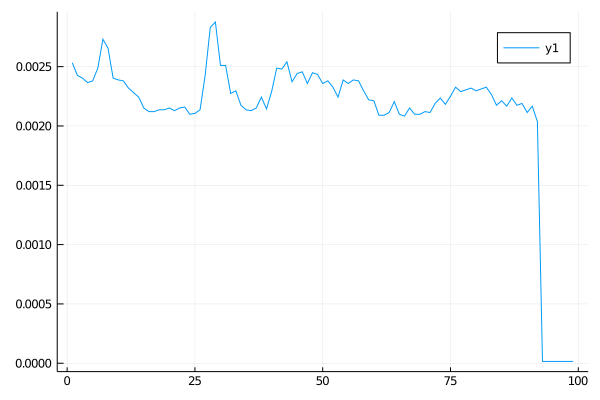

In [255]:
plot(threshold_all_)

In [258]:
@time nucleus_all__, threshold_all__ = extract3dnucleus(img3d1);
@time save(File(format"TIFF", "s35-c1_clear.ome.tiff"), N0f16.(nucleus_all__))
x, y, z_all = size(nucleus_all__)
@time embedxml(x, y, 20, z_all÷20, "s35-c1_clear.ome.tiff")

 87.367222 seconds (190.57 k allocations: 23.826 GiB, 1.66% gc time)
 37.714894 seconds (71 allocations: 5.860 GiB, 0.03% gc time)
Embedding OME-XML    1 image files updated
 18.094896 seconds (5.04 k allocations: 451.719 KiB)


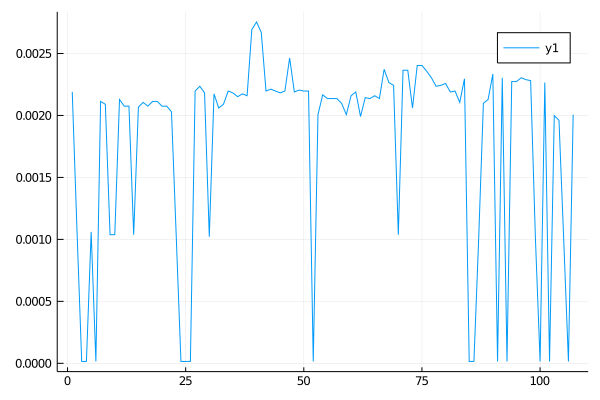

In [259]:
plot(threshold_all__)

# 2D Histogram

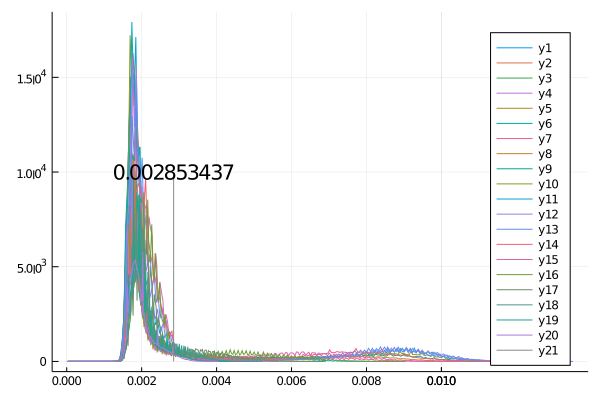

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [171]:
threshold = [real(yen_threshold(s3c2[:, :, i])) for i in 1:20 ];
threshold_2d = real(median(threshold));
plot()
for i in 1:20
    edge, count = build_histogram(s3c2[:,:,i])
    plot!(edge[2:end], count[2:end])
end
plot!(fill(threshold_2d, 2), [0, 1e4])
annotate!([threshold_2d, 1e4, "$threshold_2d"])

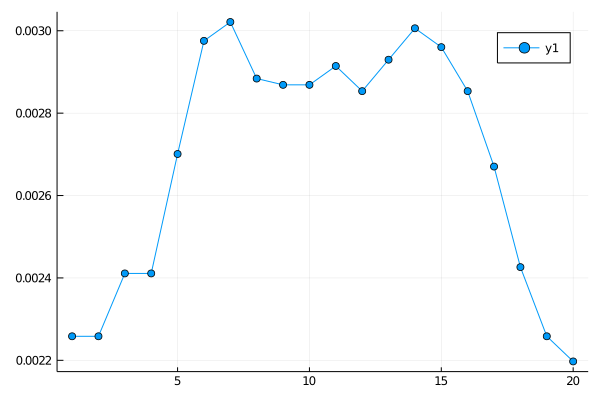

In [170]:
plot(threshold, marker=:dot)

In [ ]:
filtered = zeros(700, 700, 20);
filtered = opening(s3c2[:, :, 1:20].>median(threshold)).*s3c2[:, :, 1:20]
save("3dsegmentation.tiff", N0f16.(filtered));
save("3dsegmentation3d_opeing.tiff", N0f16.(filtered.*opening(filtered.>0)))

# 3D Histogram 

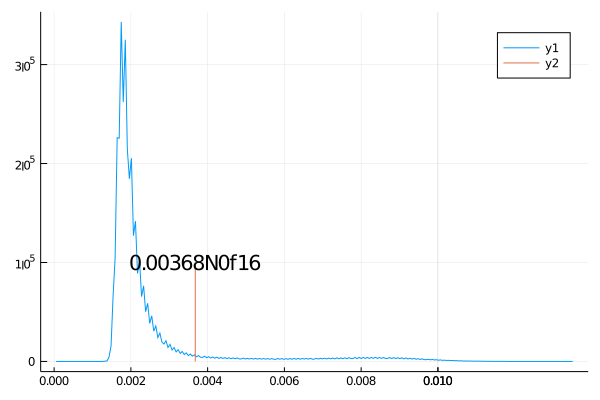

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [163]:
edge, count = build_histogram(s3c2[:,:,1:20]);
plot(edge[2:end], count[2:end])
#plot!(fill(median(threshold), 10), 0e5:2e4:1.9e5)
threshold_3d_ = real(yen_threshold(s3c2[:, :,1:20]))
plot!(fill(threshold_3d_, 2), [0, 1e5]) #, text="real(yen_threshold(s3c2[:, :,1:20]))")
annotate!([threshold_3d_, 1e5, "$threhold_3d_"])